# Introduction

### About this project

*This is a project provided by [Codecademy](https://www.codecademy.com/).* 

For this project, I will interpret data from the U.S.A. National Parks Service about endangered species in different parks. By implementing the skills of data cleaning, plotting, and analyzing, I will investigate if there are any patterns or themes to the types of species of concern.


### Data source

The original data source is from [USA National Parks Service](https://www.nps.gov/index.htm). However, the data was obtained  from the platform of Codecademy, which contains two CSV files called `observations.csv` and `species_info.csv`.

- observations.csv file holds recorded `sightings` of different species at several national parks for the `past 7 days`. 
- species_info.csv file contains data about different species and their `conservation status`.

Note: The data for this project is *inspired* by real data, but is mostly fictional.


### Goals

To investigate whether there are any patterns to the types of species of concern, I would like to answer the following 5 questions focusing on the relationship of different conservation status and sighted times among different species and classes.

To make it clear, as there is only around 3% of species listed under conservation status in the dataset of *species_info.csv*, and it's unknown why the rest of the specices were not recorded. So, you would find that for some of the below questions, I've tried to answer the questions by focusing on two different groups. One is with the species listed under conservation status, and the other could be with ALL species in the dataset or just the species NOT recorded conservation status.


1. What is the distribution of classes among *all species* in the dataset and *for the species listed under conservation status*? How are the distribution different between two groups?


2. What is the distribution of conservation status among different classes of species?


3. For the species *under conservation status* and for *all*, what are the distribution of the sighted times among different parks? Does the result reflects the conservation status?


4. For the species under conservation status, which class was spotted the most at which park?


5. Which species was spotted the most at which park?

# Data at first glance

### Variables of  species info dataset
- **category** : Class of animales or plants, which includes 7 unique classes listed below. In this dataset, `Vascular Plant` accounts for the majority.
    - Mammal
    - Bird
    - Reptile
    - Amphibian
    - Fish
    - Vascular Plant
    - Nonvascular Plant


- **scientific_name** : The scientific name of each species. There is 5541 unique values from total 5824 entries. As usually [scientific names should be unique for each different species](https://animaldiversity.org/animal_names/scientific_name/), there might be duplicated species in the dataset.


- **common_names** : The common names of each species. There is 5504 unique values from total 5824 entries. Different species could have shared same common names, so it's reasonable there are duplicated values.


- **conservation_status** : Each species’ current conservation status. There are total 4 conservation status as listed below. In the total amount of 5824 entries in the dataset, there is only around `3.3%` of species recorded for their conservation status. However, it's unknown why the rest of species were not listed conservation statas, which could mean missing data or the species not considered to be of concern. 
    - Species of Concern
    - In Recovery
    - Threatened
    - Endangered

### Variables of observations dataset
- **scientific_name** : The scientific name of each species. There is 5541 unique values from total 23296 entries. As this is a dateset collected sightings of different species at several national parks for the past 7 days, I assume if there are duplicated values, the reason might be the same species were recorded several times in different days and/or in different parks. As in the dataset, there was no column recording specific observed time and date, it would be difficult to check whether the duplicated values are truly duplicated.


- **park_name** : Park where species were found. There are total 4 national parks appeard in the dataset as listed below with `Great Smoky Mountains National Park` accounting for the majority.
    - Great Smoky Mountains National Park
    - Yosemite National Park
    - Bryce National Park
    - Yellowstone National Park


- **observations** : The number of times each species was observed at park. This is the only numerical variable in both two datasets, which would be one of the indicator to look for any patterns or themes to the types of species that might be endangered.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
observe = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

In [6]:
print(species.columns)
species.head()

Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [7]:
print(f'Species recorded conservation status in this dataset: {191/5824 *100} %')
species.info()

Species recorded conservation status in this dataset: 3.279532967032967 %
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [8]:
species.describe(include = 'all')

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [9]:
print(f'Class of species: {species.category.unique()}\n')
print(f'Conservation status: {species.conservation_status.unique()}')

Class of species: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']

Conservation status: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [10]:
print(observe.columns)
observe.head()

Index(['scientific_name', 'park_name', 'observations'], dtype='object')


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [11]:
observe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [12]:
observe.describe(include = 'all')

,scientific_name,park_name,observations
count,23296,23296,23296.000000
unique,5541,4,NaN
top,Myotis lucifugus,Great Smoky Mountains National Park,NaN
freq,12,5824,NaN
mean,NaN,NaN,142.287904
std,NaN,NaN,69.890532
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,195.000000


In [13]:
print(f'National Parks: {observe.park_name.unique()}')

National Parks: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


# Plot and Analysis

### 1. What is the distribution of classes among all species in the dataset and for the species listed under conservation status? How are the distribution different between two groups? 

As there is only around `3%` of species recorded for their conservation status in the datset, and the reason why the rest of the species were not recorded is unknown. So, I deiceded to plot the distribution of classes both for total species and for species under conservation status seperately. 

In the class distribution for *all species*, `Vascular plant` accounts for the majority class with `76.9%`. And, they are almost `9` times to the second most class, `Bird`. While, `Amphibian` and `Reptile` both got a percentage of `1.4%`, which accounts for the least among different classes.

In the other hand, in the class distribution for *species under conservation status*, `Bird` is the majority class with `41.7%`, which is around `1.6` times higher than the second most class, `Vascular plant`. And, the ranking follows by `Mammal` and `Fish`.  While, `Nonvascular plant` and `Reptile` shared the same percentage of `2.8%`, which accounts for the least among different classes. 

If looking at the graph below with the title of *Class Distribution of Species (All v.s. Under Conservation)*, you can see that even though the species in class `Bird` is much lesser than the class `Vascular plant`, however `Bird` accounts for the majority of the species under conservation status, which indicates that birds' lives are under greater threat among all the species.

In [14]:
# Create a subset without the column 'common_names'
species_sub = species.drop(columns = 'common_names')

# Check duplicated species according to 'scientifit_name' and handle with the duplicated data
species_sub.duplicated().sum() #281
species_sub.drop_duplicates(inplace = True)

# Classes of the ALL species
class_all = (species_sub.category.value_counts()
                        .reset_index()
                        .rename(columns = {'index':'category', 'category':'count'}))

# Add column 'pct' showing percentage for each category(class)
class_all['pct'] = round(class_all['count'] / class_all['count'].sum() * 100, 1)

# Classes of the species under convervation status
class_consv = (species_sub[species_sub.conservation_status.notnull()]
               .category
               .value_counts()
               .reset_index()
               .rename(columns = {'index':'category', 'category':'count'}))

# Add column 'pct' showing percentage for each category(class)
class_consv['pct'] = round(class_consv['count'] / class_consv['count'].sum() * 100, 1)
class_consv

# Merge two dataframes above
class_merge = class_all.merge(class_consv, 
                              on = 'category',
                              suffixes = ('_all', '_consv'))
class_merge

,category,count_all,pct_all,count_consv,pct_consv
0,Vascular Plant,4262,76.9,46,25.6
1,Bird,488,8.8,75,41.7
2,Nonvascular Plant,333,6.0,5,2.8
3,Mammal,177,3.2,31,17.2
4,Fish,126,2.3,11,6.1
5,Amphibian,79,1.4,7,3.9
6,Reptile,78,1.4,5,2.8


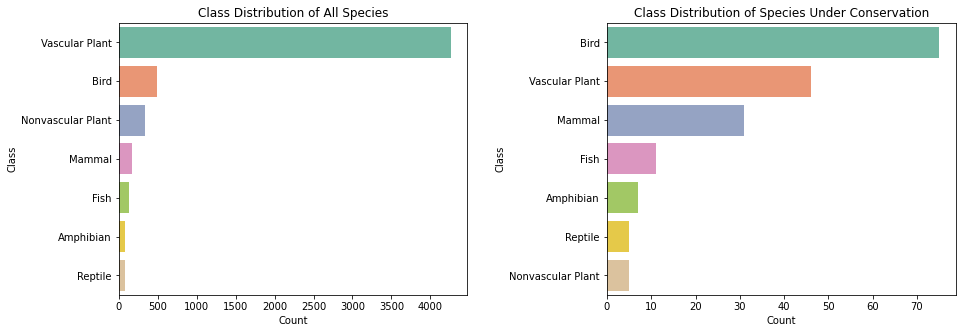

<Figure size 432x288 with 0 Axes>

In [15]:
# Plot the class distribution among all species in the dataset and for species under conservation
plt.figure(figsize=(15,5))
plt.subplots_adjust(wspace = 0.4)

ax1 = plt.subplot(1, 2, 1)
sns.barplot(data = class_all, 
            y = 'category', x = 'count', 
            palette = 'Set2')
plt.title('Class Distribution of All Species')
plt.xlabel('Count')
plt.ylabel('Class')

ax2 = plt.subplot(1, 2, 2)
sns.barplot(data = class_consv, 
            y = 'category', x = 'count',
            palette = 'Set2')
plt.title('Class Distribution of Species Under Conservation')
plt.xlabel('Count')
plt.ylabel('Class')

plt.show()
plt.clf()

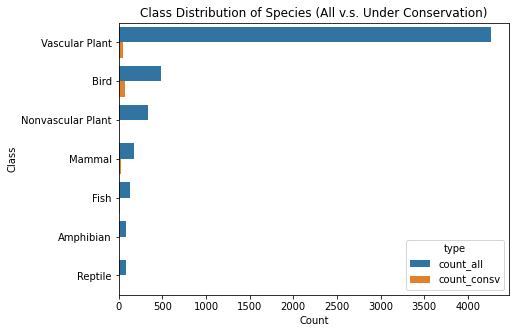

<Figure size 432x288 with 0 Axes>

In [16]:
class_melt = class_merge.melt(id_vars = 'category', 
                              value_vars = ['count_all', 'count_consv'] ,
                              var_name = 'type', value_name = 'count')

# Plot the distribution of classes: All vs Species under conservation
plt.figure(figsize=(7,5))
sns.barplot(data = class_melt,
            y = 'category', x = 'count',
            hue = 'type')
plt.xlabel('Count')
plt.ylabel('Class')
plt.title('Class Distribution of Species (All v.s. Under Conservation)')

plt.show()
plt.clf()

### 2. What is the distribution of conservation status among different classes of species?

From the graph *Overall Conservation Status Distribution*, we can find that there are totally around `150` species under the status of **Species of Concern**, which is around `7` times higher than other conservation status. And, there is very few species **in recovery**. Similar pattern applies to class `Mammal`, `Bird`, and `Vascular Plant` if looking at the graph *Conservation Status Distribution in Different Classes*. The pattern mentiioned here means that `Species of Concern` usually accounts for the main conservation status, which then follows by `Endangerd`, `Threatened`, and lastly `In Reconvery`.

At the below graph *Distribution of Classes for Each Conservation Status*, `Mammal` and `Bird` are the most concerning classes under `Species of Concern` and `Endangerd` status. And, the two are the only classes that can be found few species `in recovery`. Another class that requires attention is `Vascular Plant`, which is the second most `of concern` species. As for class `Fish` and `Amphibian`, there are a few species under the status of 'Endangerd' and 'Threatened'.

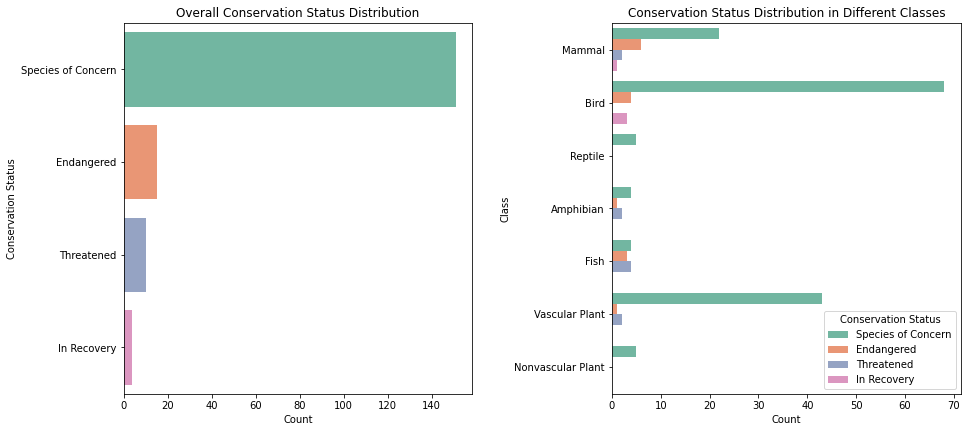

In [17]:
consv_status = (species_sub[species_sub.conservation_status.notnull()]
                .drop(columns = 'scientific_name'))
#consv_status.head()

# Plot the conservation status distribution for all and for different classes
plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace = 0.4)

ax1 = plt.subplot(2, 2, 1)
sns.countplot(data = consv_status, 
              y = 'conservation_status',
              palette = 'Set2')
plt.title('Overall Conservation Status Distribution')
plt.xlabel('Count')
plt.ylabel('Conservation Status')

ax2 = plt.subplot(2, 2, 2)
sns.countplot(data = consv_status, 
              y = 'category', hue = 'conservation_status',
              palette = 'Set2')
plt.title('Conservation Status Distribution in Different Classes')
plt.xlabel('Count')
plt.ylabel('Class')
plt.legend(title = 'Conservation Status', loc = 'lower right')

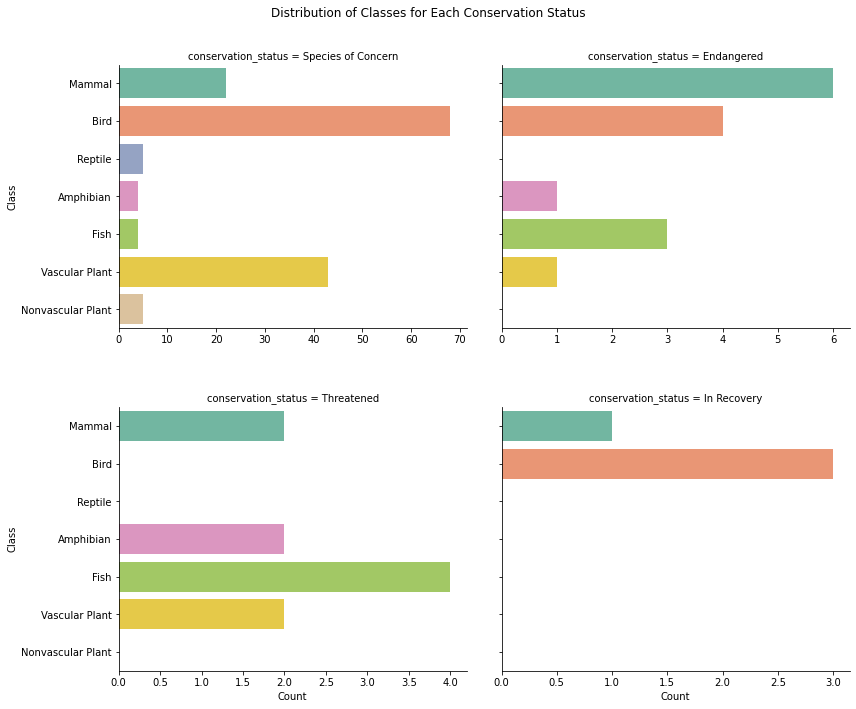

<Figure size 432x288 with 0 Axes>

In [14]:
# Plot the distribution of classes for each conservation status
g_consv = sns.catplot(data = consv_status, kind = 'count',
                      y = 'category', 
                      col = 'conservation_status', col_wrap = 2, sharex = False,
                      palette = 'Set2', height = 5, aspect = 1.2)

g_consv.set_axis_labels('Count', 'Class')
g_consv.fig.subplots_adjust(top = 0.9, hspace = 0.3, wspace = 0.1)
g_consv.fig.suptitle('Distribution of Classes for Each Conservation Status')

plt.show()
plt.clf()

### 3. For the species under conservation status and for all, what are the distribution of the sighted times among different parks? Does the result reflects the conservation status? 

As there is only around 3% of species listed under conservation status in the dataset, I am interested in what the difference might be among species *not recorded conservation status* and species *under conservation status* for the sighted times in different parks. From the first two graphs below, we can find the same pattern that `Yellow Stone National park` accounts for the majority of the observations, which then follows by the other three parks with `Great Smoky Mountains National Park` being the least. However, as these two graphs don't share the same scale on X axis, `sighted times for species NOT recorded conservation status are much higher`.

The figure below with the title of *Sighted Times of Species under Different Conservation Status and Parks* shows a pattern shared among different national parks, where species with the status of `Species of Concern` accounts for the majority, while the species under the other status have limited opportunities to be sighted. 

The result of the distribution did reflect what I've expected that species that are `Endangerd`, `Threatened`, and `In Recovery` are less likely to be sighted. However, it's still **not sure** that the higher sighted times for the species under `Species of Concern` status was truly due to the higher probability to be seen or simply because they account for the majority in this dataset.   

In [18]:
# Merge two dataframes: 'observe' and 'species_sub'
merge_all = species_sub.merge(observe, on = 'scientific_name', how = 'outer')
#merge_all.scientific_name.nunique() #5541
#merge_all.head()

# Dataset that only includes species NOT recorded conservation status 
na_consv = merge_all[merge_all.conservation_status.isnull()]
na_consv.head()

# Dataset that only includes species recorded conservation status 
consv = merge_all[merge_all.conservation_status.notnull()]
consv.head()

,category,scientific_name,conservation_status,park_name,observations
40,Mammal,Canis latrans,Species of Concern,Bryce National Park,85
41,Mammal,Canis latrans,Species of Concern,Yellowstone National Park,206
42,Mammal,Canis latrans,Species of Concern,Great Smoky Mountains National Park,68
43,Mammal,Canis latrans,Species of Concern,Yosemite National Park,99
44,Mammal,Canis lupus,Endangered,Yosemite National Park,35


In [19]:
# Calculate the sum of the sighted times for species NOT recorded conservation status in each park
na_consv_park = na_consv.groupby(['park_name']).observations.sum().reset_index()
na_consv_park

# Calculate the sum of the sighted times for species under conservation status in each park
consv_park = consv.groupby(['park_name']).observations.sum().reset_index()
consv_park

,park_name,observations
0,Bryce National Park,16393
1,Great Smoky Mountains National Park,11336
2,Yellowstone National Park,39365
3,Yosemite National Park,23729


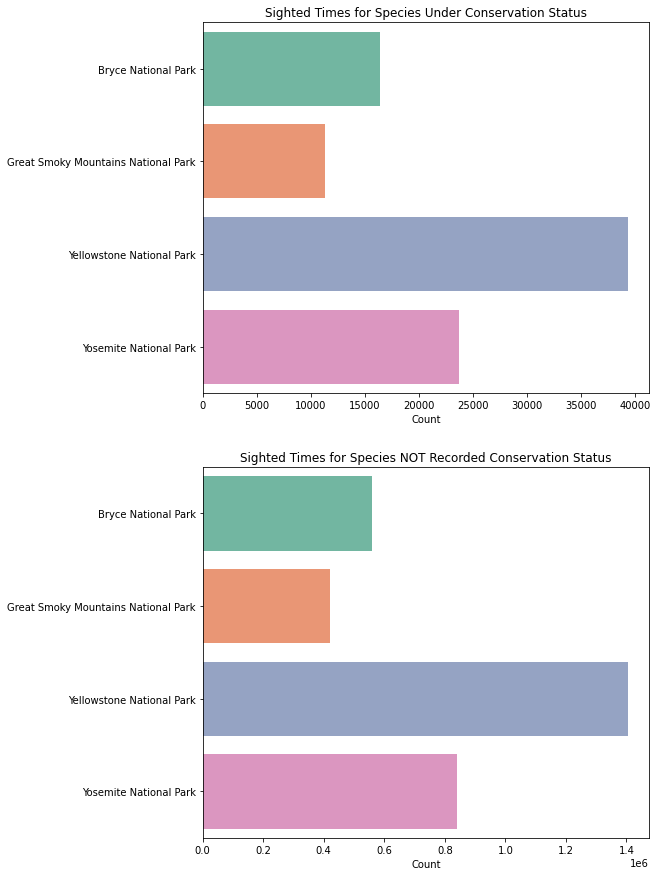

In [20]:
plt.figure(figsize=(8, 15))

plt.subplot(211)
sns.barplot(data = consv_park, 
            y = 'park_name', x = 'observations',
            palette = 'Set2')
plt.title('Sighted Times for Species Under Conservation Status')
plt.xlabel('Count')
plt.ylabel('')

plt.subplot(212)
sns.barplot(data = na_consv_park, 
            y = 'park_name', x= 'observations',
            palette = 'Set2')
plt.title('Sighted Times for Species NOT Recorded Conservation Status')
plt.xlabel('Count')
plt.ylabel('')


plt.show()

In [18]:
consv_park2 = consv.groupby(['conservation_status', 'park_name']).observations.sum().reset_index()
consv_park2.head(8)

,conservation_status,park_name,observations
0,Endangered,Bryce National Park,489
1,Endangered,Great Smoky Mountains National Park,334
2,Endangered,Yellowstone National Park,1228
3,Endangered,Yosemite National Park,747
4,In Recovery,Bryce National Park,388
5,In Recovery,Great Smoky Mountains National Park,248
6,In Recovery,Yellowstone National Park,889
7,In Recovery,Yosemite National Park,582


Text(0.5, 0.98, 'Sighted Times of Species under Different Conservation Status and Parks')

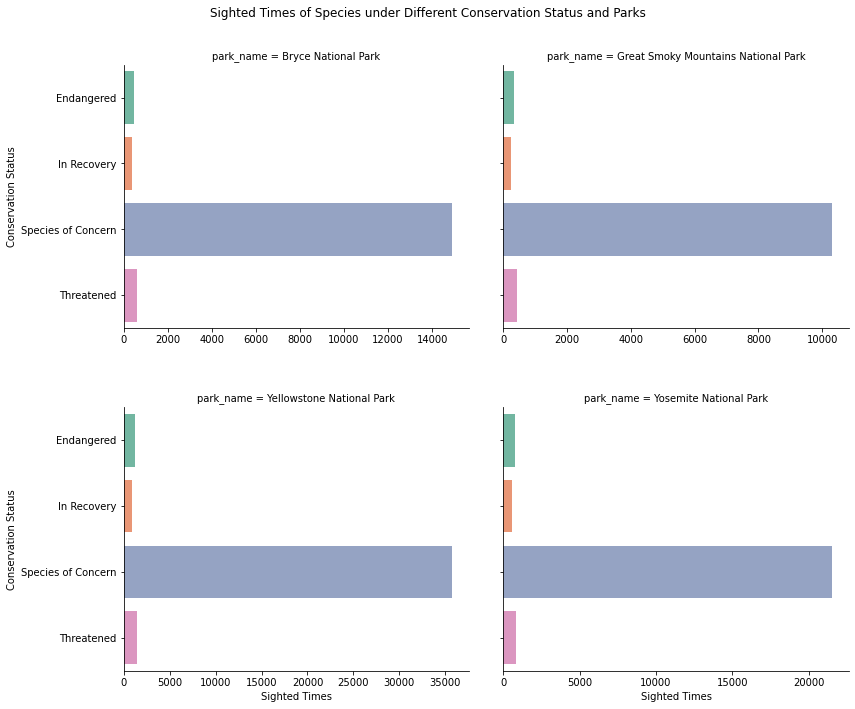

In [19]:
g_sight_status = sns.catplot(data = consv_park2, kind = 'bar',
                             x = 'observations', y = 'conservation_status',
                             col = 'park_name', col_wrap = 2, sharex = False,
                             palette = 'Set2', height = 5, aspect = 1.2)

g_sight_status.set_axis_labels('Sighted Times', 'Conservation Status')
g_sight_status.fig.subplots_adjust(top = 0.9, hspace = 0.3, wspace = 0.1)
g_sight_status.fig.suptitle('Sighted Times of Species under Different Conservation Status and Parks')

### 4. For the species under conservation status, which class was spotted the most at which park? 

From the last quesiton, we've known that `Yellow Stone National park` accounts for the majority of the observations.At this section, I try to focus on how the `classes` ditributed among the observations of the species under conservation status.

From the barplot below, you can see that the class **Bird**, as the first rank among 4 national parks, was recorded around `1.5` times higher than the second most class, **Vascular Plant**.

In [20]:
consv_park3 = (consv.groupby(['category', 'park_name'])
                    .observations.sum()
                    .reset_index()
                    .sort_values('observations', ascending = False))
consv_park3.head()

,category,park_name,observations
6,Bird,Yellowstone National Park,16788
7,Bird,Yosemite National Park,10153
26,Vascular Plant,Yellowstone National Park,9716
14,Mammal,Yellowstone National Park,7550
4,Bird,Bryce National Park,6926


Text(0.5, 0.98, 'Sighted Times of Species in Different Classes and Parks')

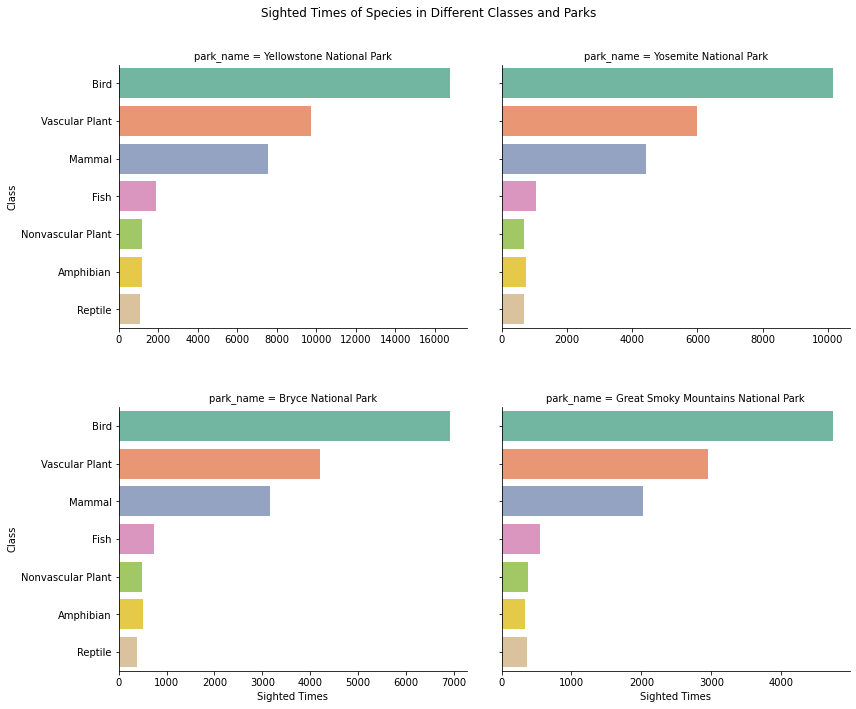

In [21]:
g_sight_class = sns.catplot(data = consv_park3, kind = 'bar',
                            x = 'observations', y = 'category',
                            col = 'park_name', col_wrap = 2, sharex = False,
                            palette = 'Set2', height = 5, aspect = 1.2)

g_sight_class.set_axis_labels('Sighted Times', 'Class')
g_sight_class.fig.subplots_adjust(top = 0.9, hspace = 0.3, wspace = 0.1)
g_sight_class.fig.suptitle('Sighted Times of Species in Different Classes and Parks')

### 5. Which species was spotted the most at which park? 

To answer this question, I decided to seperate the species into two groups first, which are *species NOT recorded conservation status* and *species under conservation status*.

Below in the upper table shows that the most sighted species NOT recorded conservation status is **Holcus lanatus**, which belongs to class `Vascular Plant` and is with `805` sighted times. While, the lower table shows that the most sighted species under conservation status is **Myotis lucifugus**, which belongs to class `Mammal` and is with `679` sighted times. What out of my expectation is the number of the sighted times between these 2 species has not much difference. 

In [22]:
# Count the observations among the species NOT recorded conservation status
most_sighted_na_consv = (na_consv.groupby(['category', 'scientific_name', 'park_name'])
                                 .observations.sum()
                                 .reset_index()
                                 .sort_values('observations', ascending = False))
most_sighted_na_consv.head()

,category,scientific_name,park_name,observations
12150,Vascular Plant,Holcus lanatus,Yellowstone National Park,805
1722,Bird,Streptopelia decaocto,Yellowstone National Park,771
2758,Mammal,Puma concolor,Yellowstone National Park,753
2754,Mammal,Procyon lotor,Yellowstone National Park,745
12438,Vascular Plant,Hypochaeris radicata,Yellowstone National Park,726


In [23]:
# Count the observations among the species under conservation status
most_sighted_consv = (consv.groupby(['category', 'scientific_name', 'conservation_status', 'park_name'])
                           .observations.sum()
                           .reset_index()
                           .sort_values('observations', ascending = False))
most_sighted_consv.head()

,category,scientific_name,conservation_status,park_name,observations
450,Mammal,Myotis lucifugus,Species of Concern,Yellowstone National Park,679
218,Bird,Pandion haliaetus,Species of Concern,Yellowstone National Park,466
402,Mammal,Eptesicus fuscus,Species of Concern,Yellowstone National Park,463
414,Mammal,Lasionycteris noctivagans,Species of Concern,Yellowstone National Park,450
490,Mammal,Taxidea taxus,Species of Concern,Yellowstone National Park,449


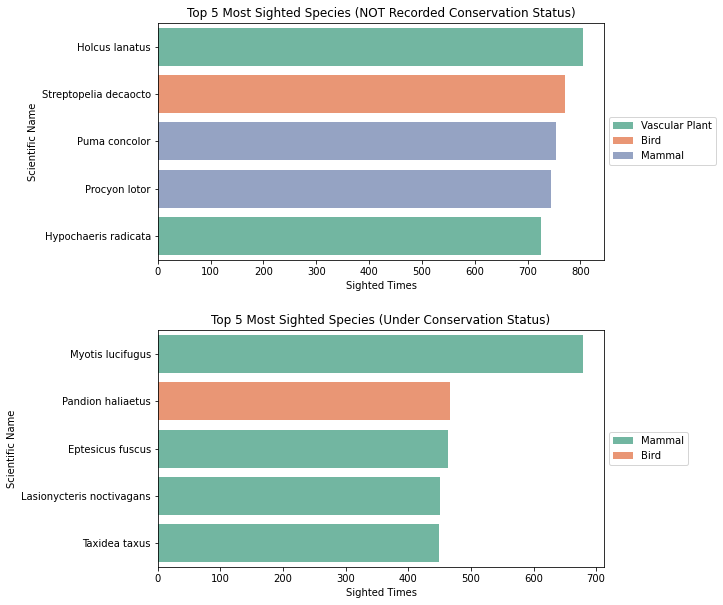

<Figure size 432x288 with 0 Axes>

In [24]:
# PLot the barplot of most sighted species for above two groups
plt.figure(figsize=(8,10))
plt.subplots_adjust(hspace = 0.3)

plt.subplot(211)
ax1 = sns.barplot(data = most_sighted_na_consv.head(),
            y = 'scientific_name', x = 'observations',
            hue = 'category',
            palette = 'Set2',
            dodge = False)  # 'dodge = False' is used here for aligning the bars and ticks
plt.title('Top 5 Most Sighted Species (NOT Recorded Conservation Status)')
plt.xlabel('Sighted Times')
plt.ylabel('Scientific Name')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
                                              

plt.subplot(212)
ax2 = sns.barplot(data = most_sighted_consv.head(),
            y = 'scientific_name', x = 'observations',
            hue = 'category',
            palette = 'Set2',
            dodge = False)
plt.title('Top 5 Most Sighted Species (Under Conservation Status)')
plt.xlabel('Sighted Times')
plt.ylabel('Scientific Name')
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()
plt.clf()

# Conclusions

**1. What is the distribution of classes among `all species` in the dataset and `for the species listed under conservation status`? How are the distribution different between two groups?**

In the class distribution for *all species*, `Vascular plant` accounts for the majority class with `76.9%`. And, they are almost `9` times to the second most class, `Bird`. In the other hand, in the class distribution for *species under conservation status*, `Bird` is the majority class with `41.7%`,which is around `1.6` times higher than the second most class, `Vascular plant`. And, the ranking follows by `Mammal` and `Fish`. 

From above analysis, we know that the species from the class `Vascular plant` and `bird` account for the majority in both groups. However, the biggest difference between these two groups would be the total amount of species listed under conservation status, no matter which class they belong to, were all significantly less comparing to the other group.


**2. What is the distribution of conservation status among different classes of species?**

There is a pattern sharing among most of the classes, in which `Species of Concern` usually accounts for the main conservation status, and then it follows by the status of 'Endangerd', 'Threatened', and lastly 'In Reconvery'.

However, if we look closer to the distribution of classes for each conservation status, `Mammal`, `Bird` and `Vascular Plant` would be the most concerning classes under the status of `Species of Concern` or `Endangerd`.


**3. For the species `under conservation status` and for `all`, what are the distribution of the sighted times among different parks? Does the result reflects the conservation status?** 

For the species under conservation status and for all, there is the same pattern that `Yellow Stone National park` accounts for the majority of the observations, which then follows by the other three parks with `Great Smoky Mountains National Park` being the least.

To answer the quesiton of whether the sighted times distribution reflecs the conservation status, we have to look closer to the sighted times of species under different conservation status. In the graph, it shows that no matter in which national park, the species with the status of `Species of Concern` have higher sighted times. While the others were less likely to be observed.

However, it's still not sure that the higher sighted times for the species under `Species of Concern` status was truly due to the higher probability to be seen or simply because they account for the majority in this dataset.   


**4. For the species under conservation status, which class was spotted the most at which park?**

The class `Bird` was spotted the most in `Yellow Stone National park`, which was around `1.5` times higher than the second most class, `Vascular Plant`.


**5. Which species was spotted the most at which park?** 

In the group of `species NOT recorded conservation status`, the most spotted species is **Holcus lanatus**, which belongs to class `Vascular Plant` and is with `805` sighted times. While, in the group of `species under conservation status`, **Myotis lucifugus** belonging to class `Mammal` won the first rank with `679` sighted times. What out of my expectation is the number of the sighted times between these 2 species has not much difference. 


# Other Thoughts and Possible Further Research

When I was answering the Question 5, there was a fact I thought interesting, which was that the top 5 most sighted species under conservation status are from the class `Mammal` and `Bird`. However, both Mammal and Bird classes also account for the majority of the species that are `endangered` and `of concern`. 

Still, I think the result is somehow reasonable if viewing the table called *most_sighted_consv*, you can find the top 5 most-sighted species were all listed under `Species of Concern` which means they indeed have higher chances being sighted if comparing to the species under the status of 'Endangered', 'Threatened' and 'In Recovery'.

With the above finding, it reminds me that even though the analysis shows certain classes of species are under greater threat, it's still very important to have a closer look on EACH species in order to understand each situation the specific species is facing.

One thing I think could help improve similar analysis is to add a column of `observation date` on the *observations.csv*. As once the record time expands through the seasons, the weather could have siginificant influence on the possibility of observations for different species. With observation date as another pattern indicator, one can see a bigger picture when investigating such analysis.